In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
from matplotlib import pyplot as plt

# Get US Census Data
1. Convert CSV files for population and number of housing units to pandas frames
2. Clean and format dataframes
3. Join population and housing data
4. Join census data to NYC census blocks shapefile

In [2]:
# Create pandas frame for population
population = pd.read_csv('DECENNIALDHC2020.P1-Data.csv')
population.head()

C:\Users\Monty\AppData\Local\Temp\ipykernel_15908\3683289755.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  population = pd.read_csv('DECENNIALDHC2020.P1-Data.csv')


GEO_ID  \
0                 Geography   
1  1000000US360010001001000   
2  1000000US360010001001001   
3  1000000US360010001001002   
4  1000000US360010001001003   

                                                NAME   P1_001N  
0                               Geographic Area Name   !!Total  
1  Block 1000, Block Group 1, Census Tract 1, Alb...         0  
2  Block 1001, Block Group 1, Census Tract 1, Alb...         0  
3  Block 1002, Block Group 1, Census Tract 1, Alb...         0  
4  Block 1003, Block Group 1, Census Tract 1, Alb...         0

In [3]:
# Remove the second row
population = population.drop(0)
population.head()

GEO_ID  \
1  1000000US360010001001000   
2  1000000US360010001001001   
3  1000000US360010001001002   
4  1000000US360010001001003   
5  1000000US360010001001004   

                                                NAME P1_001N  
1  Block 1000, Block Group 1, Census Tract 1, Alb...       0  
2  Block 1001, Block Group 1, Census Tract 1, Alb...       0  
3  Block 1002, Block Group 1, Census Tract 1, Alb...       0  
4  Block 1003, Block Group 1, Census Tract 1, Alb...       0  
5  Block 1004, Block Group 1, Census Tract 1, Alb...       0

In [4]:
# Rename columns for easier use
population = population.rename(columns={'P1_001N': 'population'})


In [5]:
# Split Name field into multiple fields to filter Counties
population[['Block', 'Block_Group','Census_Tract','County','State']] = population['NAME'].str.split(', ', expand=True)
# Keep only NYC block level data (5 counties)
substrings = ['Queens','New York','Richmond','Kings','Bronx']
pattern = '|'.join(substrings)
population = population[population['County'].str.contains(pattern,case = False)]

In [7]:
population.head()

GEO_ID  \
8020  1000000US360050001000001   
8021  1000000US360050001000002   
8022  1000000US360050001001000   
8023  1000000US360050001001001   
8024  1000000US360050001001002   

                                                   NAME population  \
8020  Block 0001, Block Group 0, Census Tract 1, Bro...          0   
8021  Block 0002, Block Group 0, Census Tract 1, Bro...          0   
8022  Block 1000, Block Group 1, Census Tract 1, Bro...        171   
8023  Block 1001, Block Group 1, Census Tract 1, Bro...       1344   
8024  Block 1002, Block Group 1, Census Tract 1, Bro...        367   

           Block    Block_Group    Census_Tract        County     State  
8020  Block 0001  Block Group 0  Census Tract 1  Bronx County  New York  
8021  Block 0002  Block Group 0  Census Tract 1  Bronx County  New York  
8022  Block 1000  Block Group 1  Census Tract 1  Bronx County  New York  
8023  Block 1001  Block Group 1  Census Tract 1  Bronx County  New York  
8024  Block 1002  Block Group 1  Census Tract 1  Bronx County  New York

In [8]:
population['County'].unique()

array(['Bronx County', 'Kings County', 'New York County', 'Queens County',
       'Richmond County'], dtype=object)

In [10]:
# Create geo_id that matches with NYC Census Blocks Shapefile
# Shapefile's Geo_ID has 15 digits matching the last 15 digits of population file
population['GEO_ID'] = population['GEO_ID'].str.extract(r'(\d{15})$')
population.head()

GEO_ID                                               NAME  \
8020  360050001000001  Block 0001, Block Group 0, Census Tract 1, Bro...   
8021  360050001000002  Block 0002, Block Group 0, Census Tract 1, Bro...   
8022  360050001001000  Block 1000, Block Group 1, Census Tract 1, Bro...   
8023  360050001001001  Block 1001, Block Group 1, Census Tract 1, Bro...   
8024  360050001001002  Block 1002, Block Group 1, Census Tract 1, Bro...   

     population       Block    Block_Group    Census_Tract        County  \
8020          0  Block 0001  Block Group 0  Census Tract 1  Bronx County   
8021          0  Block 0002  Block Group 0  Census Tract 1  Bronx County   
8022        171  Block 1000  Block Group 1  Census Tract 1  Bronx County   
8023       1344  Block 1001  Block Group 1  Census Tract 1  Bronx County   
8024        367  Block 1002  Block Group 1  Census Tract 1  Bronx County   

         State  
8020  New York  
8021  New York  
8022  New York  
8023  New York  
8024  New York

In [13]:
# Keep only necessary fields
pop_fields = ['GEO_ID','population','County']
population = population.drop(population.columns.difference(pop_fields), axis=1)
population.head()

GEO_ID population        County
8020  360050001000001          0  Bronx County
8021  360050001000002          0  Bronx County
8022  360050001001000        171  Bronx County
8023  360050001001001       1344  Bronx County
8024  360050001001002        367  Bronx County

In [14]:
# Iterate same commands for number of housing units
housing = pd.read_csv('DECENNIALDHC2020.H1-Data.csv')
housing = housing.drop(0)
housing.head()



C:\Users\Monty\AppData\Local\Temp\ipykernel_15908\621514660.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('DECENNIALDHC2020.H1-Data.csv')


GEO_ID  \
1  1000000US360010001001000   
2  1000000US360010001001001   
3  1000000US360010001001002   
4  1000000US360010001001003   
5  1000000US360010001001004   

                                                NAME H1_001N  
1  Block 1000, Block Group 1, Census Tract 1, Alb...       0  
2  Block 1001, Block Group 1, Census Tract 1, Alb...       0  
3  Block 1002, Block Group 1, Census Tract 1, Alb...       0  
4  Block 1003, Block Group 1, Census Tract 1, Alb...       0  
5  Block 1004, Block Group 1, Census Tract 1, Alb...       0

In [18]:
housing = housing.rename(columns={'H1_001N': 'units'})
housing[['Block', 'Block_Group','Census_Tract','County','State']] = housing['NAME'].str.split(', ', expand=True)
# Use the same substirngs as population data
pattern = '|'.join(substrings)
housing = housing[housing['County'].str.contains(pattern,case = False)]
housing['GEO_ID'] = housing['GEO_ID'].str.extract(r'(\d{15})$')
housing_fields = ['GEO_ID','units'] # No need for county - exists in population data
housing = housing.drop(housing.columns.difference(housing_fields), axis=1)

In [19]:
housing.head()

GEO_ID units
8020  360050001000001     0
8021  360050001000002     0
8022  360050001001000     0
8023  360050001001001     1
8024  360050001001002     0

In [21]:
# Join both dataframes by GEO_ID field
census = pd.merge(population, housing, on='GEO_ID')
census.head()

GEO_ID population        County units
0  360050001000001          0  Bronx County     0
1  360050001000002          0  Bronx County     0
2  360050001001000        171  Bronx County     0
3  360050001001001       1344  Bronx County     1
4  360050001001002        367  Bronx County     0

In [22]:
# Join census data with NYC census blocks shapefile
blocks = gpd.read_file('2020 Census Blocks - Tabular_20231206.zip')


In [27]:
cb = blocks.merge(census, left_on='geoid', right_on='GEO_ID')


In [28]:
cb.head()

cb2020 borocode   boroname  ct2020    bctcb2020            geoid  \
0   1000        1  Manhattan  000100  10001001000  360610001001000   
1   1001        1  Manhattan  000100  10001001001  360610001001001   
2   1000        1  Manhattan  000201  10002011000  360610002011000   
3   1001        1  Manhattan  000201  10002011001  360610002011001   
4   2000        1  Manhattan  000201  10002012000  360610002012000   

    shape_leng    shape_area  \
0  6437.853745  1.202838e+06   
1  4395.190183  6.401664e+05   
2  1569.384823  1.292763e+05   
3  1594.262855  1.393604e+05   
4  2055.295961  2.633084e+05   

                                            geometry           GEO_ID  \
0  POLYGON ((-74.03995 40.70089, -74.03945 40.700...  360610001001000   
1  POLYGON ((-74.04388 40.69019, -74.04351 40.689...  360610001001001   
2  POLYGON ((-73.98511 40.71379, -73.98706 40.713...  360610002011000   
3  POLYGON ((-73.98506 40.71308, -73.98544 40.713...  360610002011001   
4  POLYGON ((-73.98495 40.71236, -73.98485 40.711...  360610002012000   

  population           County units  
0          0  New York County     0  
1          0  New York County     0  
2        801  New York County   344  
3          0  New York County     0  
4       1186  New York County   497

In [35]:
# Convert population and units to number fields
cb['population'] = pd.to_numeric(cb['population'])
cb['units'] = pd.to_numeric(cb['units'])


C:\Users\Monty\AppData\Local\Temp\ipykernel_15908\751898516.py:1: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  cb.plot(column='population',colormap='Spectral_r',legend=True,linewidth=0, edgecolor = 'black',figsize=(20,20))


<Axes: >

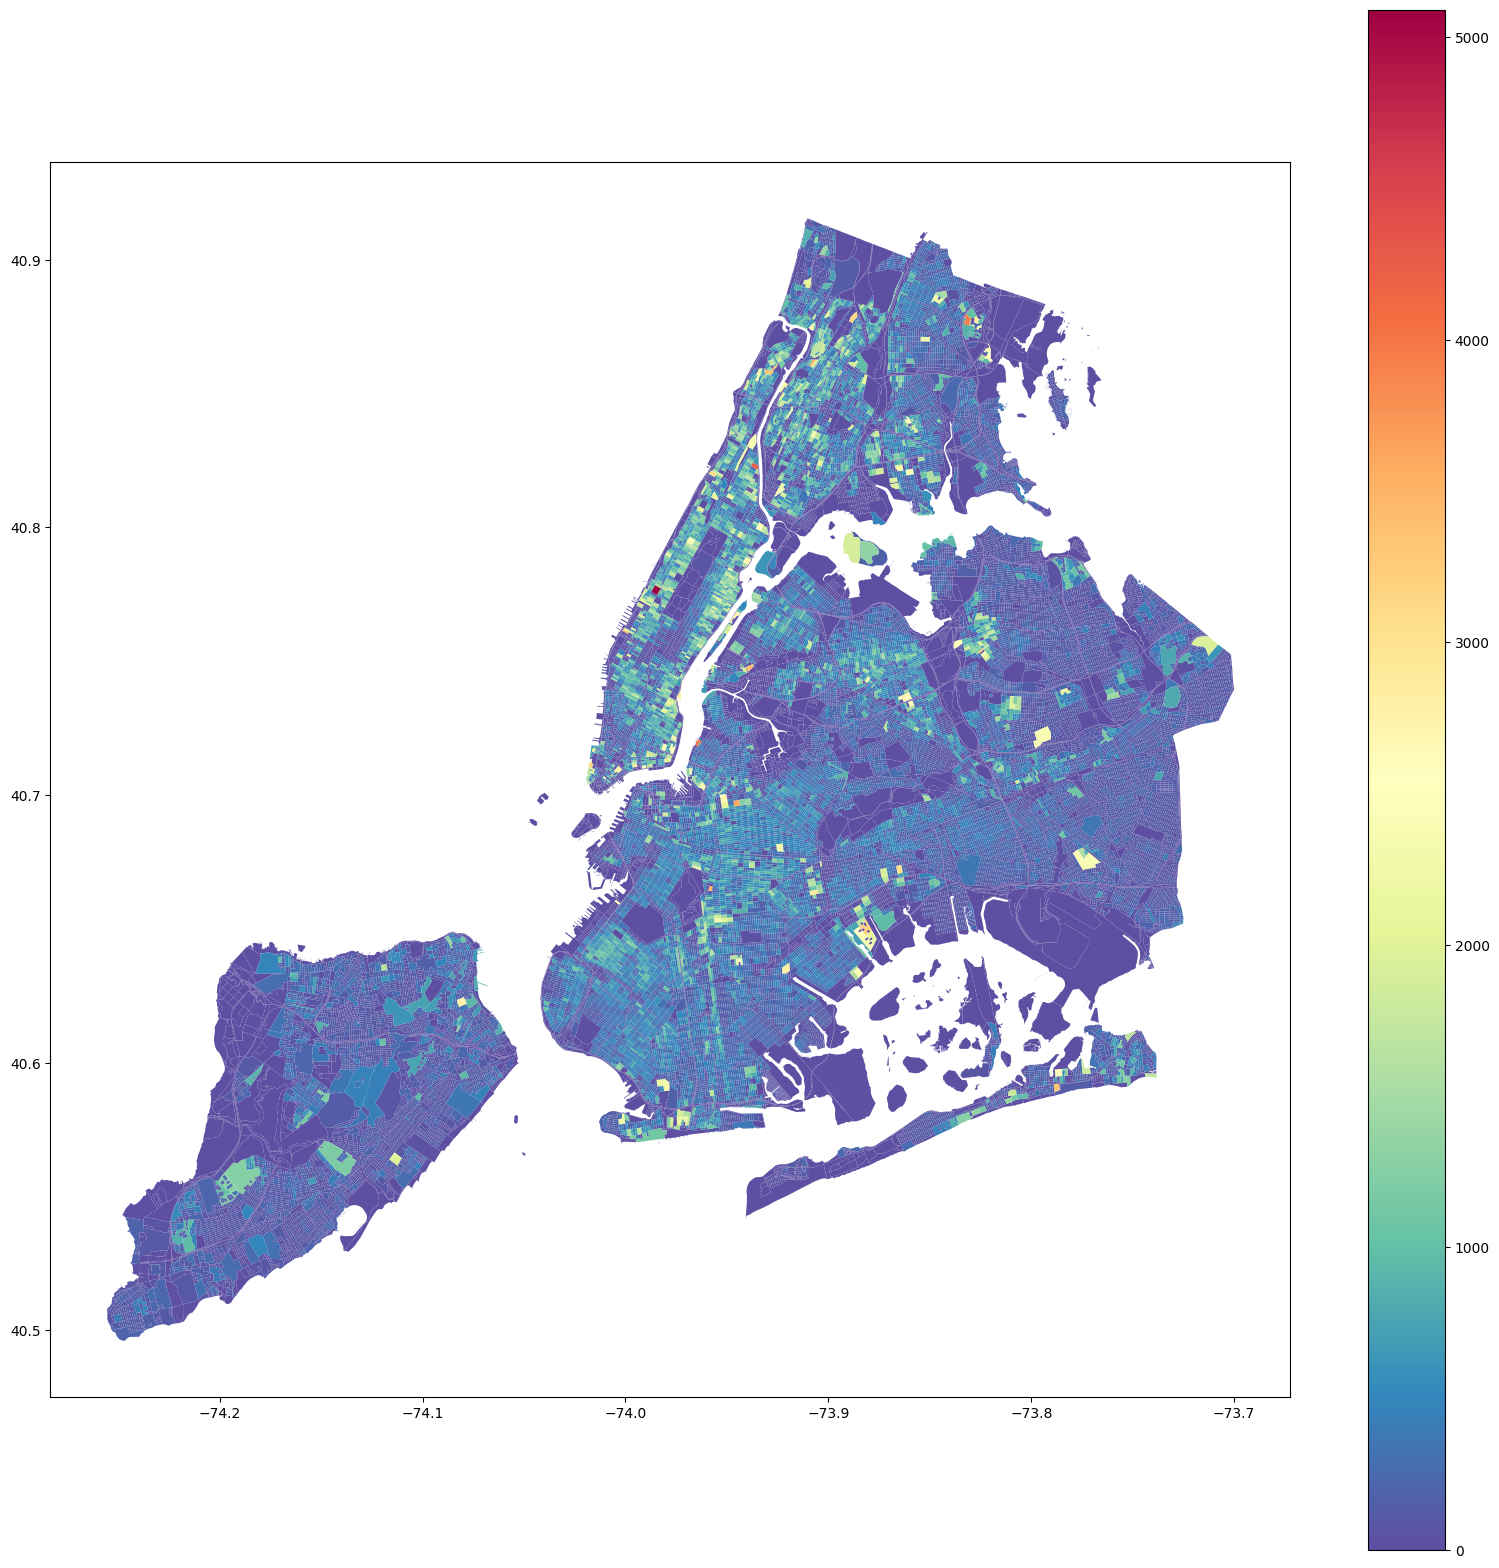

In [52]:
cb.plot(column='population',colormap='Spectral_r',legend=True,linewidth=0, edgecolor = 'black',figsize=(20,20))

C:\Users\Monty\AppData\Local\Temp\ipykernel_15908\3662624334.py:1: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  cb.plot(column='units',colormap='Spectral_r',legend=True,linewidth=0, edgecolor = 'black',figsize=(20,20))


<Axes: >

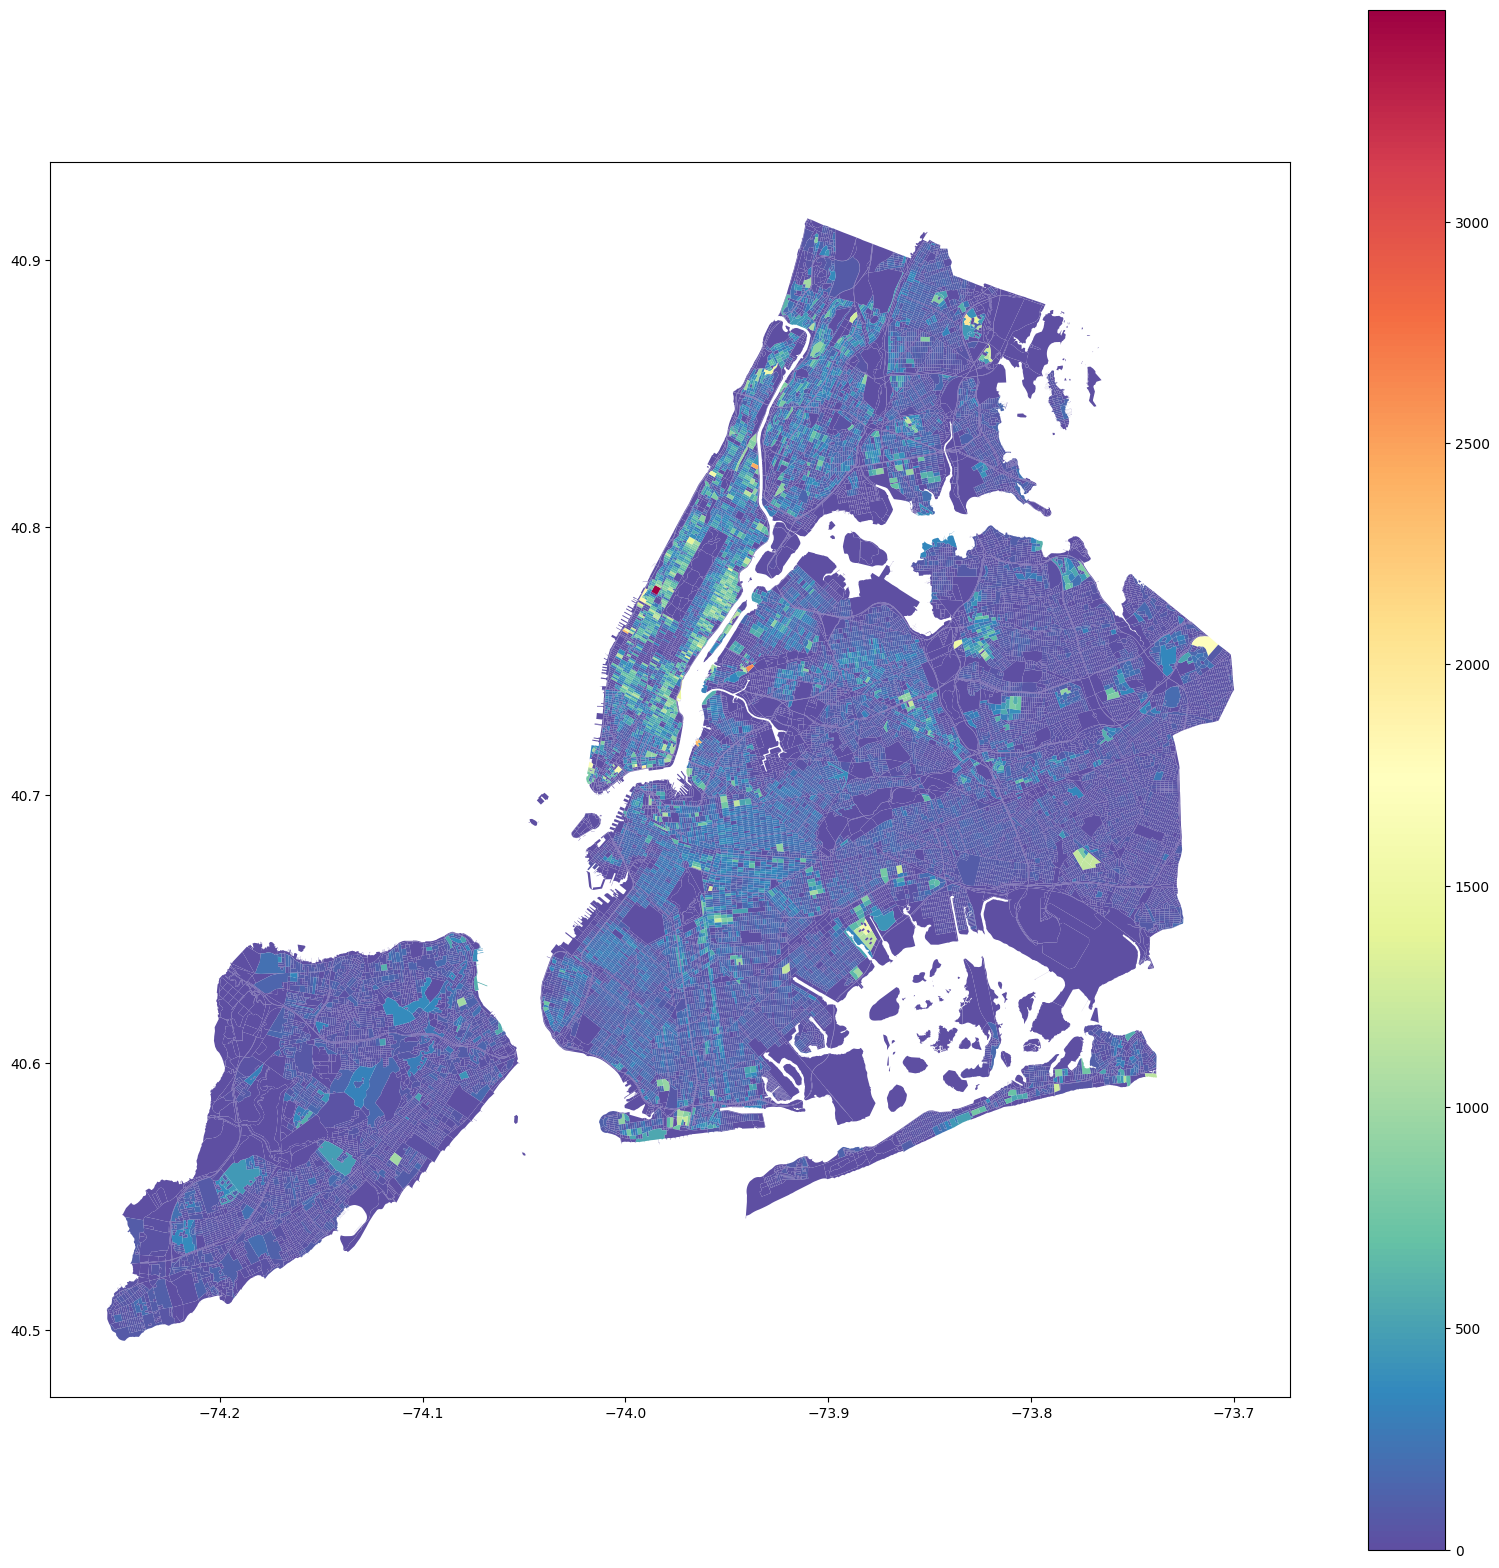

In [53]:
cb.plot(column='units',colormap='Spectral_r',legend=True,linewidth=0, edgecolor = 'black',figsize=(20,20))

In [61]:
# Import pluto data (taxlots) 
pluto = pd.read_csv('pluto_20v8.csv')

C:\Users\Monty\AppData\Local\Temp\ipykernel_15908\941085682.py:1: DtypeWarning: Columns (18,19,20,21,22,23,24,26,63,76,79,86) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto = pd.read_csv('pluto_20v8.csv')


In [64]:
# List field names
pluto.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healthcenterdistrict',
       'healtharea', 'sanitboro', 'sanitdistrict', 'sanitsub', 'address',
       'zonedist1', 'zonedist2', 'zonedist3', 'zonedist4', 'overlay1',
       'overlay2', 'spdist1', 'spdist2', 'spdist3', 'ltdheight', 'splitzone',
       'bldgclass', 'landuse', 'easements', 'ownertype', 'ownername',
       'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'areasource',
       'numbldgs', 'numfloors', 'unitsres', 'unitstotal', 'lotfront',
       'lotdepth', 'bldgfront', 'bldgdepth', 'ext', 'proxcode', 'irrlotcode',
       'lottype', 'bsmtcode', 'assessland', 'assesstot', 'exempttot',
       'yearbuilt', 'yearalter1', 'yearalter2', 'histdist', 'landmark',
       'builtfar', 'residfar', 'commfar', 'facilfar', 'borocode', 'bbl',
       'condono', 'tract2010', 'xcoo

In [68]:
# Filter to usable fields
pluto = pluto.filter(['resarea','unitsres','bbl','latitude','longitude'])
pluto.head()

resarea  unitsres           bbl   latitude  longitude
0   2520.0       1.0  1.019490e+09  40.809373 -73.953971
1   2821.0       3.0  3.063720e+09  40.604796 -74.000792
2   1672.0       3.0  3.064360e+09  40.603001 -74.006399
3      NaN       0.0  3.008500e+09  40.637706 -74.009692
4    935.0       1.0  3.067460e+09  40.618098 -73.957348

In [111]:
# Create a geodataframe from pluto data
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(pluto['longitude'], pluto['latitude'])]
lots = gpd.GeoDataFrame(pluto, geometry=geometry)


In [112]:
# Limit the data to taxlots with residential data (150 sq is minimum legal apartment size)
lots = lots[lots['resarea'] > 150]

C:\Users\Monty\AppData\Local\Temp\ipykernel_15908\1765434840.py:2: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  lots.plot(column='resarea',colormap='Spectral_r',scheme='Quantiles', k=10,legend=True,markersize=0.05,figsize=(20,20))


<Axes: >

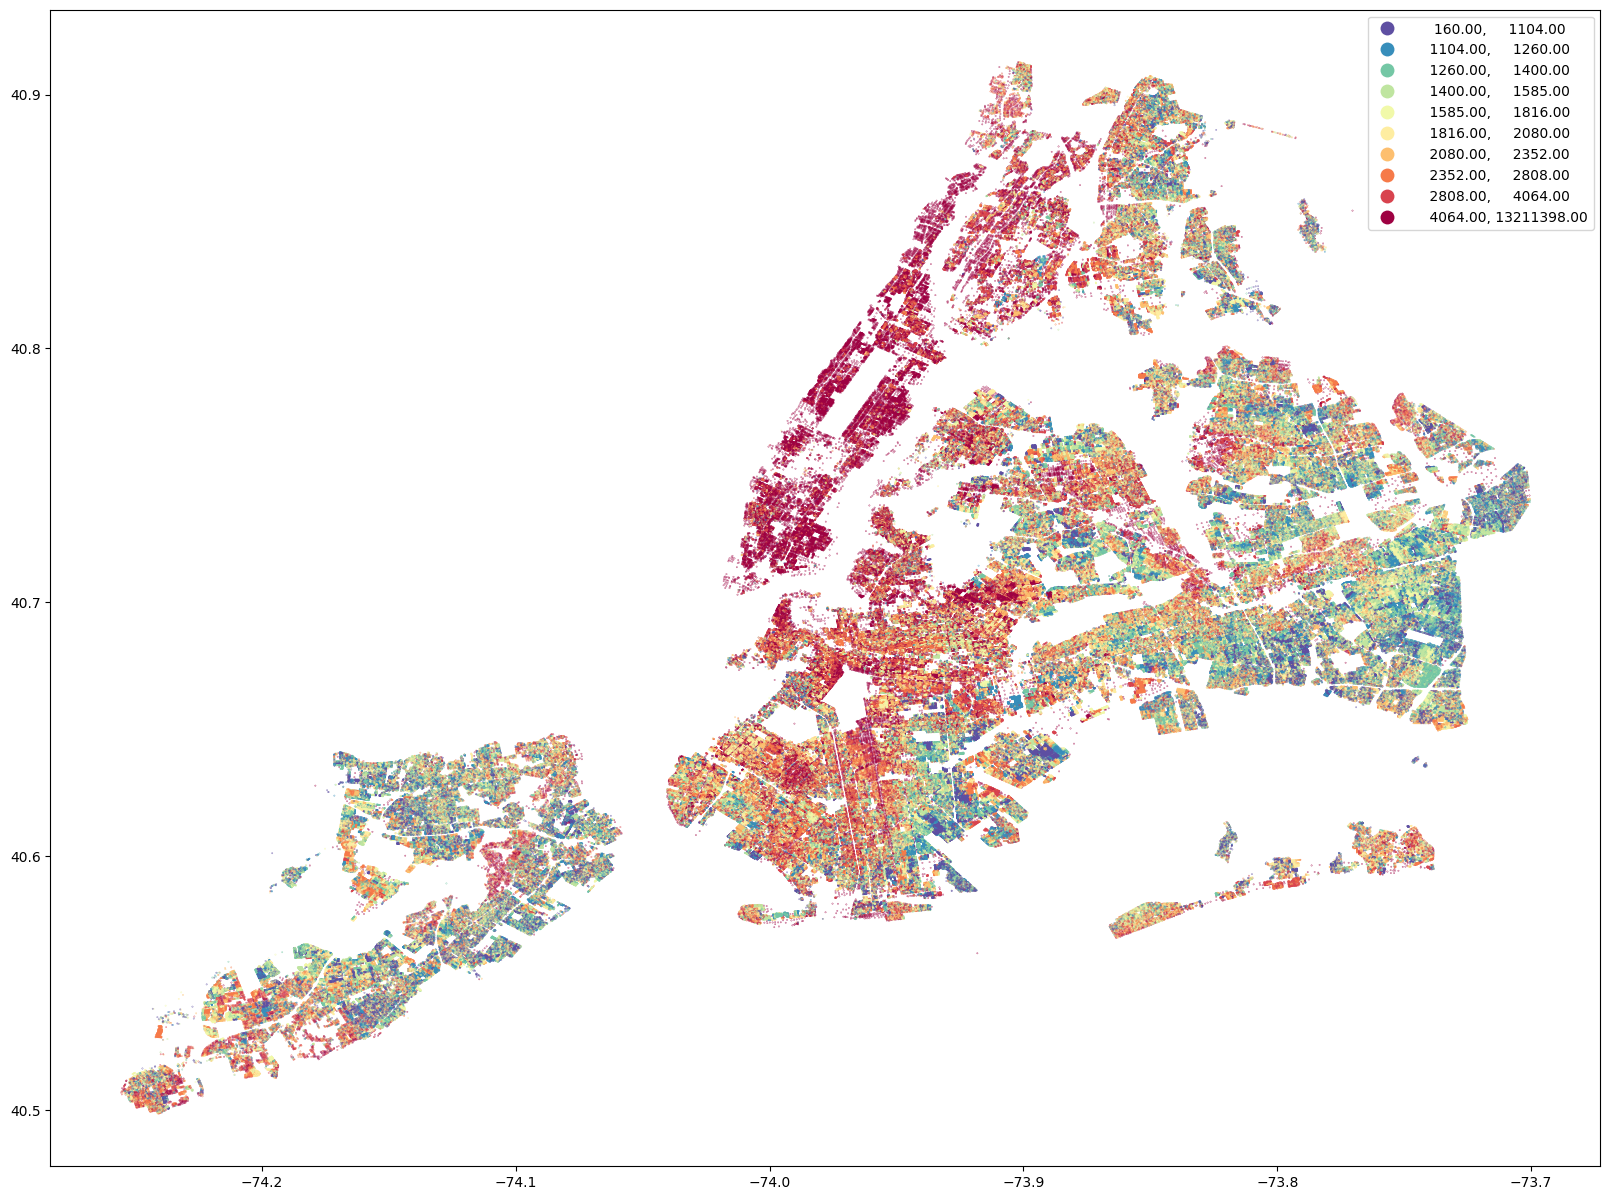

In [94]:
# Plot a map of taxlots based on residential area
lots.plot(column='resarea',colormap='Spectral_r',scheme='Quantiles', k=10,legend=True,markersize=0.05,figsize=(20,20))

In [113]:
# Assign same CRS to lots and cb
lots = lots.set_crs("EPSG:4326")
cb = cb.to_crs("EPSG:4326")


In [130]:
# Perform a spatial join and summarize residential area from lots by census block
joined = gpd.sjoin(lots, cb, op='within')
result = joined.groupby('index_right')['resarea'].sum().reset_index()


c:\Users\Monty\anaconda3\envs\alihanDeneme\lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [134]:
# Check the summary of residential area 
result.head()

index_right   resarea
0            2  193553.0
1            4  431685.0
2            5  275260.0
3           11  126210.0
4           12  513000.0

In [138]:
# Create new geodata frame with the join
joined_result = pd.merge(cb, result, left_index=True, right_on='index_right')
nyc = gpd.GeoDataFrame(joined_result, geometry=joined_result.geometry)


In [139]:
nyc.head()

cb2020 borocode   boroname  ct2020    bctcb2020            geoid  \
0   1000        1  Manhattan  000201  10002011000  360610002011000   
1   2000        1  Manhattan  000201  10002012000  360610002012000   
2   2001        1  Manhattan  000201  10002012001  360610002012001   
3   1004        1  Manhattan  000202  10002021004  360610002021004   
4   2000        1  Manhattan  000202  10002022000  360610002022000   

    shape_leng     shape_area  \
0  1569.384823  129276.332277   
1  2055.295961  263308.439360   
2  1823.170998  202044.840242   
3  1158.412887   82791.722261   
4  2178.777427  157313.542923   

                                            geometry           GEO_ID  \
0  POLYGON ((-73.98511 40.71379, -73.98706 40.713...  360610002011000   
1  POLYGON ((-73.98495 40.71236, -73.98485 40.711...  360610002012000   
2  POLYGON ((-73.98478 40.71123, -73.98470 40.710...  360610002012001   
3  POLYGON ((-73.98388 40.71320, -73.98506 40.713...  360610002021004   
4  POLYGON ((-73.98187 40.71144, -73.98209 40.711...  360610002022000   

   population           County  units  index_right   resarea  
0         801  New York County    344            2  193553.0  
1        1186  New York County    497            4  431685.0  
2          25  New York County      1            5  275260.0  
3         248  New York County    141           11  126210.0  
4         863  New York County    396           12  513000.0

In [153]:
# Remove areas with zero population
nyc = nyc[nyc['population'] > 0]
# Calculate residential density (per person area)
nyc['density'] = nyc['resarea'] / nyc['population']

c:\Users\Monty\anaconda3\envs\alihanDeneme\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


C:\Users\Monty\AppData\Local\Temp\ipykernel_15908\523753748.py:1: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  nyc.plot(column='density',colormap='Spectral_r',scheme='quantiles', k=10,legend=True,markersize=0.05,figsize=(20,20))


<Axes: >

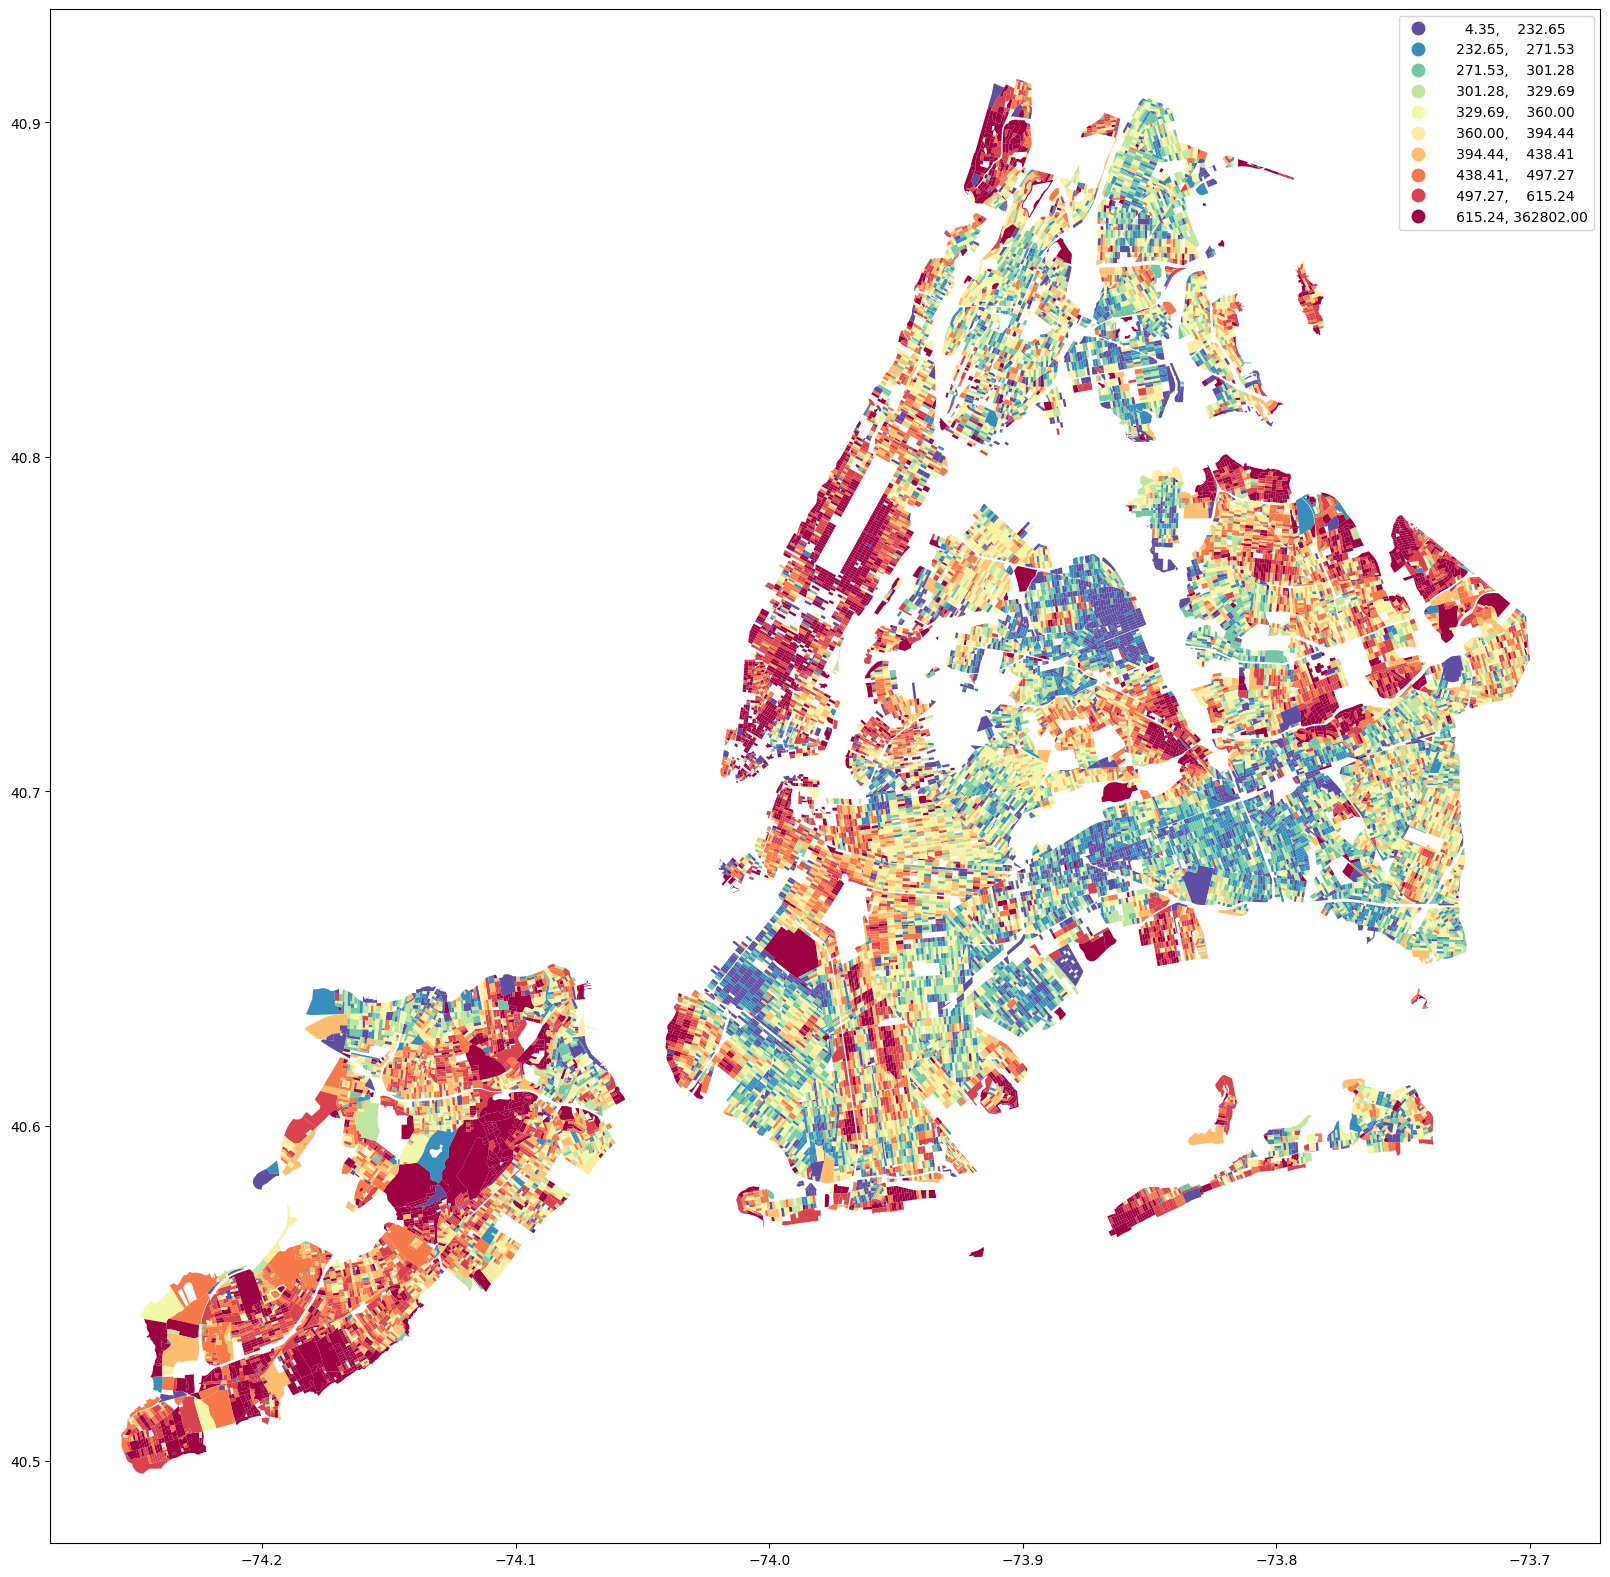

In [172]:
nyc.plot(column='density',colormap='Spectral_r',scheme='quantiles', k=10,legend=True,markersize=0.05,figsize=(20,20))

In [173]:
# Export to a shapefile
nyc.to_file('nyc.shp')


C:\Users\Monty\AppData\Local\Temp\ipykernel_15908\2067313097.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nyc.to_file('nyc.shp')


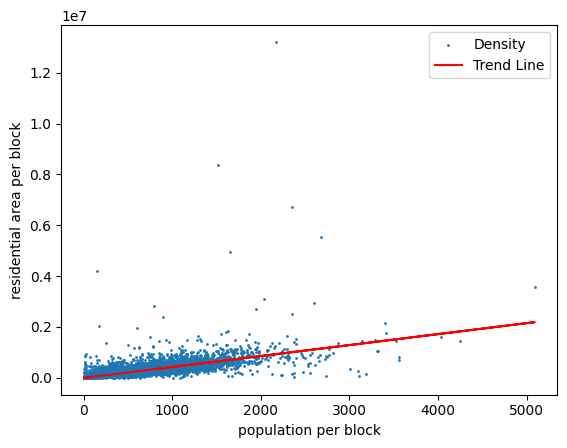

In [181]:
# Create a scatter plot and trend line for density
from sklearn.linear_model import LinearRegression
plt.scatter(nyc['population'], nyc['resarea'], label='Density', s=1)
lr = LinearRegression()
lr.fit(nyc['population'].values.reshape(-1, 1), nyc['resarea'].values.reshape(-1, 1))

# Plot the trend line
plt.plot(nyc['population'], lr.predict(nyc['population'].values.reshape(-1, 1)), color='red', label='Trend Line')
plt.xlabel('population per block')
plt.ylabel('residential area per block')
plt.legend()